In [4]:
#https://towardsdatascience.com/how-to-create-a-fully-automated-ai-based-trading-system-with-python-708503c1a907
!pip install yfinance
!pip install pandas

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
google = yf.Ticker('GOOG')

In [2]:
google.info

{'address1': '1600 Amphitheatre Parkway',
 'city': 'Mountain View',
 'state': 'CA',
 'zip': '94043',
 'country': 'United States',
 'phone': '650-253-0000',
 'website': 'https://abc.xyz',
 'industry': 'Internet Content & Information',
 'industryKey': 'internet-content-information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'sectorKey': 'communication-services',
 'sectorDisp': 'Communication Services',
 'longBusinessSummary': 'Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, including ads, Android, Chrome, devices, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play and YouTube;

In [3]:
df = google.history(period='1d', interval="1m")
print(df.head())

                                 Open        High         Low       Close  \
Datetime                                                                    
2025-12-08 09:30:00-05:00  320.880005  321.230011  320.230011  320.559998   
2025-12-08 09:31:00-05:00  320.429993  320.940002  319.250000  319.480011   
2025-12-08 09:32:00-05:00  319.505005  319.529999  318.339996  318.508606   
2025-12-08 09:33:00-05:00  318.429993  319.609985  318.100006  318.679993   
2025-12-08 09:34:00-05:00  318.700012  319.749908  318.649994  319.529999   

                           Volume  Dividends  Stock Splits  
Datetime                                                    
2025-12-08 09:30:00-05:00  737916       0.21           0.0  
2025-12-08 09:31:00-05:00  152819       0.00           0.0  
2025-12-08 09:32:00-05:00  165279       0.00           0.0  
2025-12-08 09:33:00-05:00  116291       0.00           0.0  
2025-12-08 09:34:00-05:00   87727       0.00           0.0  


In [4]:
df = google.history(period='1d', interval="1m")
df = df[['Low']]
df.head()


,Low
Datetime,
2025-12-08 09:30:00-05:00,320.230011
2025-12-08 09:31:00-05:00,319.250000
2025-12-08 09:32:00-05:00,318.339996
2025-12-08 09:33:00-05:00,318.100006
2025-12-08 09:34:00-05:00,318.649994


In [5]:
X = df.index.values
y = df['Low'].values
# The split point is the 10% of the dataframe length
offset = int(0.10*len(df))
X_train = X[:-offset]
y_train = y[:-offset]
X_test  = X[-offset:]
y_test  = y[-offset:]

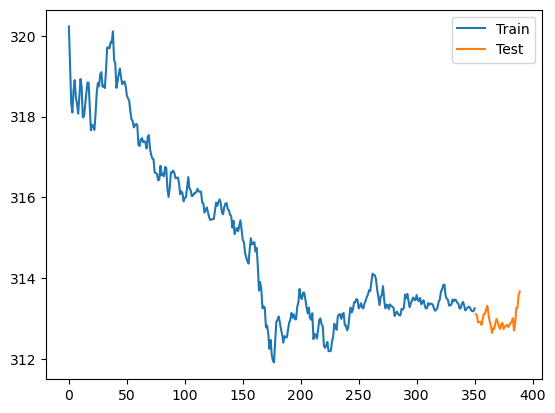

In [6]:
plt.plot(range(0,len(y_train)),y_train, label='Train')
plt.plot(range(len(y_train),len(y)),y_test,label='Test')
plt.legend()
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train, order=(5,0,1)).fit()
forecast = model.forecast(steps=1)[0]

/Users/chingyin806/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
print(f'Real data for time 0: {y_train[len(y_train)-1]}')
print(f'Real data for time 1: {y_test[0]}')
print(f'Pred data for time 1: {forecast}')

Real data for time 0: 313.25
Real data for time 1: 313.1099853515625
Pred data for time 1: 313.2758037242563


In [11]:
!pip install robin_stocks

In [12]:
import pyotp
import robin_stocks as robinhood
RH_USER_EMAIL = 
RH_PASSWORD = <<<YOUR PASSWORD GOES HERE>>>
RH_MFA_CODE = <<<THE ALPHANUMERIC CODE GOES HERE>>>
timed_otp = pyotp.TOTP(RH_MFA_CODE).now()
login = rh.login(RH_USER_EMAIL, RH_PASSWORD, mfa_code=totp)

SyntaxError: invalid syntax (694003321.py, line 3)

In [24]:
!pip install alpaca-trade-api


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.4/189.4 kB 3.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.9/397.9 kB 6.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.